## Task2: Prediction using Unsupervised ML

### Annapareddy Pardha Saradhi Reddy

### Sparks Foundation Internship


In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [2]:
#Reading csv file
iris=pd.read_csv("C:/Users/pardh/Desktop/Iris.csv", sep=",", encoding="ISO-8859-1", header=0)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
#inspecting data 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Checking null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### EDA

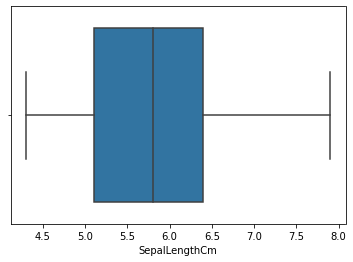

In [7]:
sns.boxplot(iris['SepalLengthCm']);

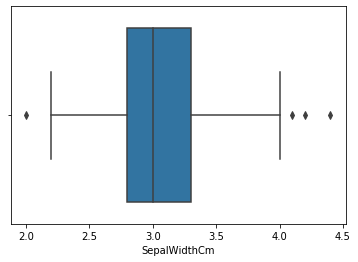

In [8]:
sns.boxplot(iris['SepalWidthCm']);

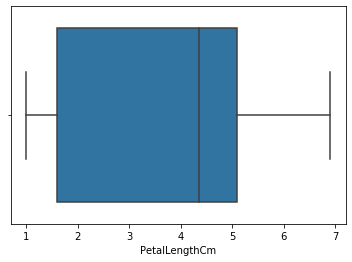

In [9]:
sns.boxplot(iris['PetalLengthCm']);

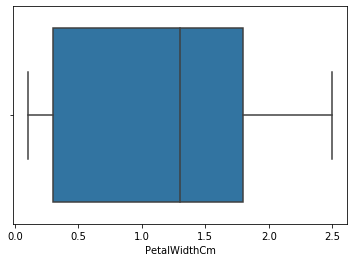

In [10]:
sns.boxplot(iris['PetalWidthCm']);

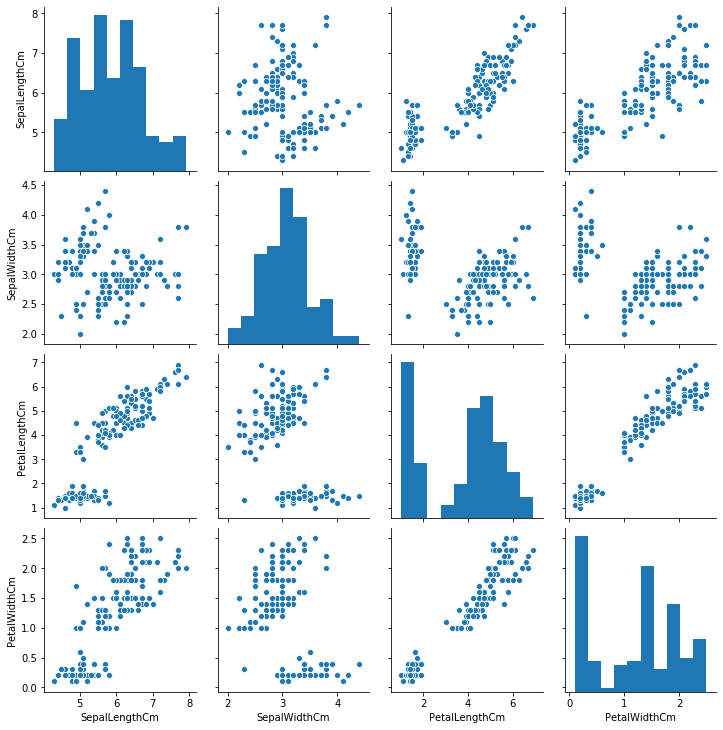

In [11]:
#Pairplot
sns.pairplot(iris.drop('Id',axis=1));

In [12]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Hopkin Score

In [13]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [14]:
hopkins(iris.drop(['Species','Id'],axis=1))

0.797099275758217

In [15]:
iris_data=iris.drop(['Species','Id'],axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Scaling the Data

In [16]:
scaler = StandardScaler()

# fit_transform
iris_data_scaled = scaler.fit_transform(iris_data)
iris_data_scaled.shape

(150, 4)

In [17]:
iris_data_scaled = pd.DataFrame(iris_data_scaled)
iris_data_scaled.columns = iris_data.columns
iris_data_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Optimal Value of K

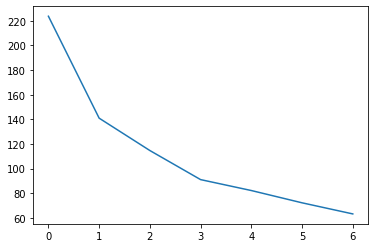

In [18]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(iris_data_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [19]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(iris_data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(iris_data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.580184463257396
For n_clusters=3, the silhouette score is 0.4589717867018717
For n_clusters=4, the silhouette score is 0.3871819671740912
For n_clusters=5, the silhouette score is 0.34805236242232845
For n_clusters=6, the silhouette score is 0.32503406068216806
For n_clusters=7, the silhouette score is 0.3390309176309411
For n_clusters=8, the silhouette score is 0.3316831038825319


In [20]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=50)
kmeans.fit(iris_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [21]:
# assign the label
iris['cluster_id'] = kmeans.labels_
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


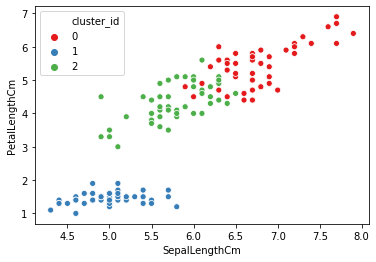

In [22]:
#plot data with seaborn
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'cluster_id', data = iris, palette = 'Set1')
plt.show()

Here Cluster 0 is having high SepalLengthCm and high petalLengthCm


Cluster1 have low SepalLengthCm and PetalLengthCm 


Cluster2 have medium SepalLengthCm and PetalLengthCm

In [23]:
iris[iris['cluster_id']==1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [24]:
iris[iris['cluster_id']==0].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,0
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,0
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,0
56,57,6.3,3.3,4.7,1.6,Iris-versicolor,0
58,59,6.6,2.9,4.6,1.3,Iris-versicolor,0


In [25]:
iris[iris['cluster_id']==2].tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
134,135,6.1,2.6,5.6,1.4,Iris-virginica,2
138,139,6.0,3.0,4.8,1.8,Iris-virginica,2
142,143,5.8,2.7,5.1,1.9,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2
